# Intialisation 

In [191]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy.stats import skew
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

## Outlining the data

In [192]:
#Just assigning variables so we can read from our training and testing data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#Getting a general idea of how the data looks like for train
#As this will be what we train our model with 
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [193]:
#Same purpose as above
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [194]:
#Useful to know incase we want to check if the data is still intact after 
#editing it 
print ("Size of train data : {}" .format(train.shape))

print ("Size of test data : {}" .format(test.shape))

Size of train data : (1460, 81)
Size of test data : (1459, 80)


In [195]:
#ID is just a unique identifier, not relevant to predicting SalePrice
#So we can just save it as a variable
train_ID = train['Id']
test_ID = test['Id']

#Then drop it.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [196]:
print ("Size of train data after dropping Id: {}" .format(train.shape))
print ("Size of test data after dropping Id: {}" .format(test.shape))

Size of train data after dropping Id: (1460, 80)
Size of test data after dropping Id: (1459, 79)


## 1. Exploratory Data Analysis

In [197]:
#Looking at our Key Variable immediately
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

According to the documentation, there are outliers in the GrLivArea (which we
can see below in the graph) so we just delete them as shown below. 

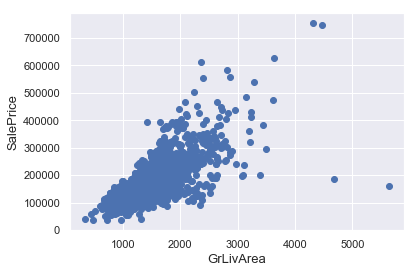

In [198]:
fig, ax = plt.subplots()
#Plotting a graph of GrLivArea against SalePrice to just show the outliers
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [199]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

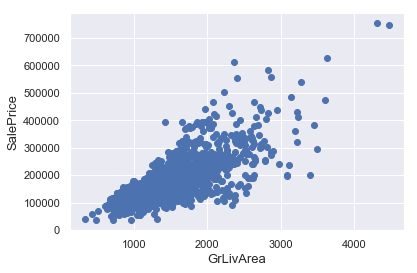

In [200]:
#Showing outliers are gone
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 1.1 Finding correlations against key variable (SalePrice)

In [201]:
#Seeing all the correlations against our Key Variable
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePrice, dtype: float64

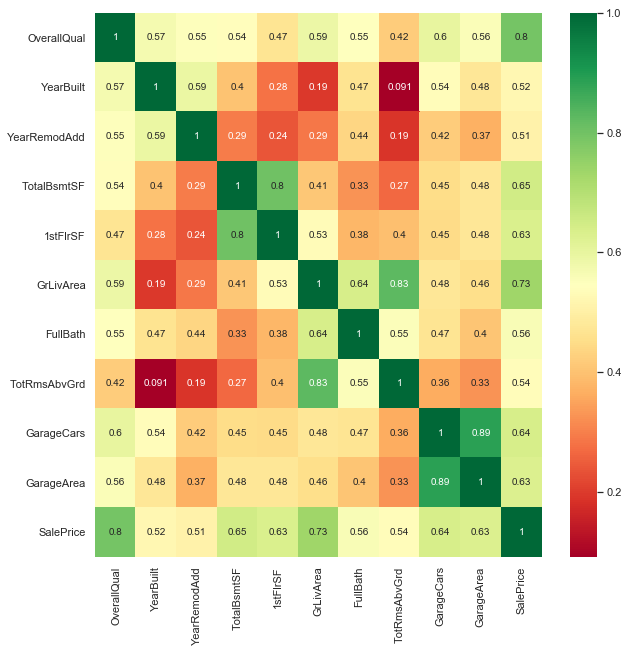

In [202]:
#Showing the most correlated feature 
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## 1.2 Showing the correlations

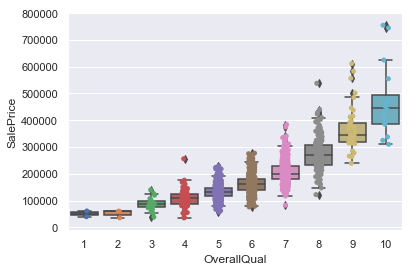

In [203]:
#Showing how correlated OverQual is with SalePrice
sns.boxplot(train['OverallQual'], train['SalePrice']);
sns.stripplot(train["OverallQual"],train["SalePrice"], jitter=True)

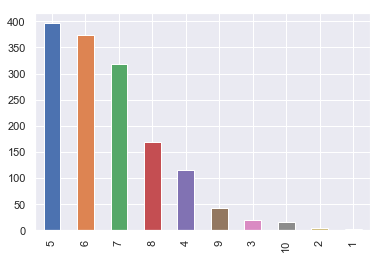

In [204]:
#Here we see the total amount of each OverallQual in the train dataset
#Showing that, as you could probably guess, 5 is the most common
train['OverallQual'].value_counts().plot(kind="bar");

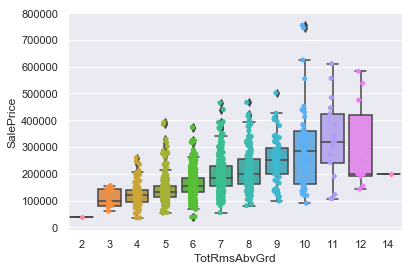

In [205]:
#Here we see a very linear relationship until we get to very high values
#we can observe why this is 
sns.boxplot(train['TotRmsAbvGrd'], train['SalePrice']);
sns.stripplot(train["TotRmsAbvGrd"],train["SalePrice"], jitter=True)

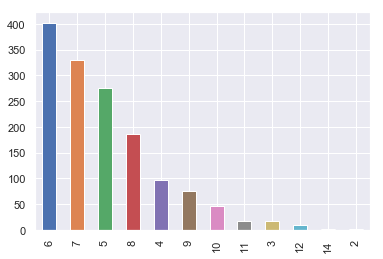

In [206]:
#The extreme amounts at either end are both very uncommon so they're hard
#to observe a trend from
train['TotRmsAbvGrd'].value_counts().plot(kind="bar");

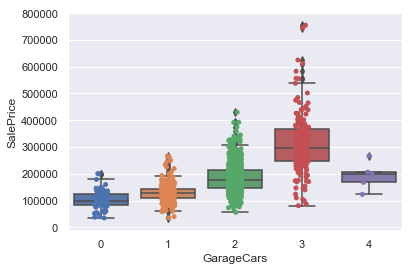

In [207]:
#We're repeating the process at this point
sns.boxplot(train['GarageCars'], train['SalePrice']);
sns.stripplot(train["GarageCars"],train["SalePrice"], jitter=True)

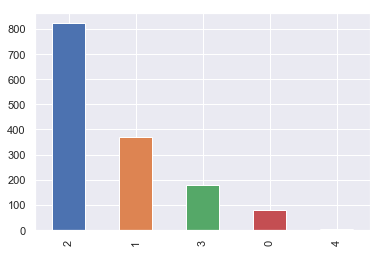

In [208]:
#Once again, the high end is a low sample size, making it unreliable
train['GarageCars'].value_counts().plot(kind="bar");

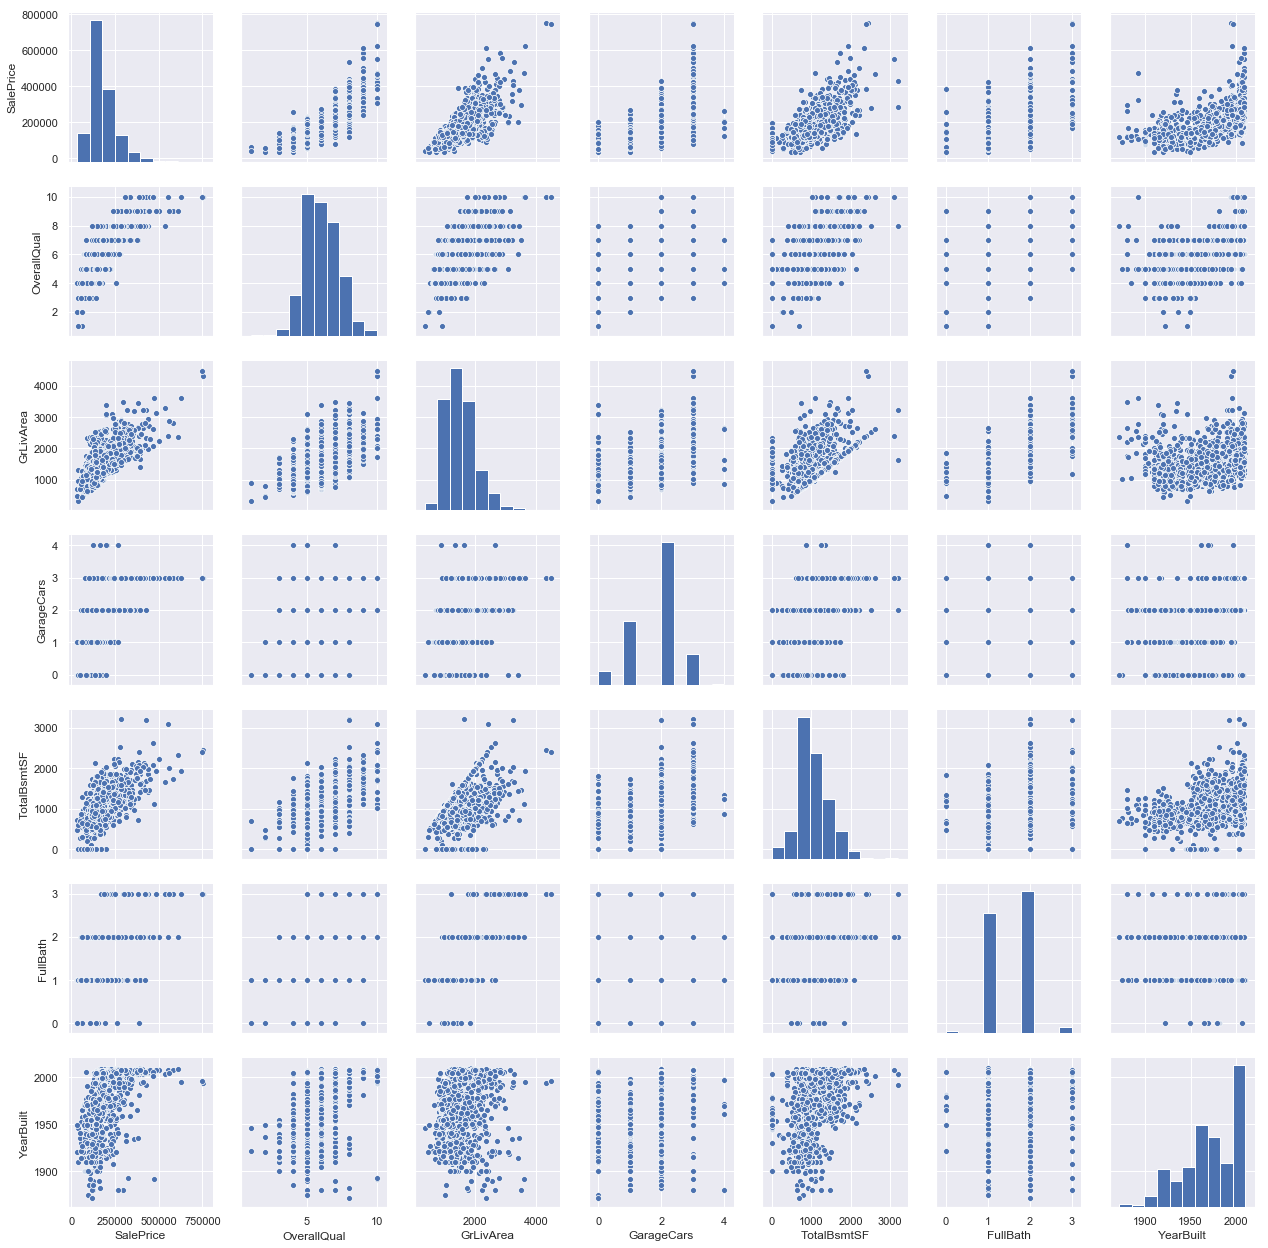

In [209]:
#A large set of correlations to see if anything immediately jumps out
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

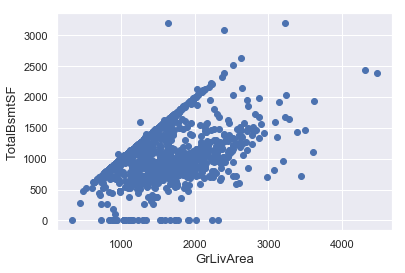

In [210]:
#This was shown above, an interesting correlation
fig, ax = plt.subplots()
#Plotting a graph of GrLivArea against SalePrice to just show the outliers
ax.scatter(x = train['GrLivArea'], y = train['TotalBsmtSF'])
plt.ylabel('TotalBsmtSF', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

C:\Programming\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


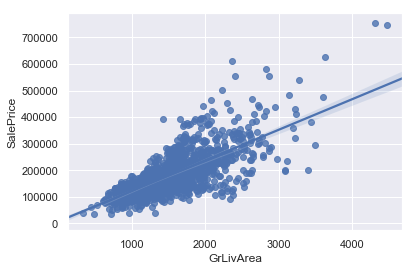

In [211]:
#Now the next few graphs will be showing the most highly correlated features
sns.regplot('GrLivArea','SalePrice',data=train);

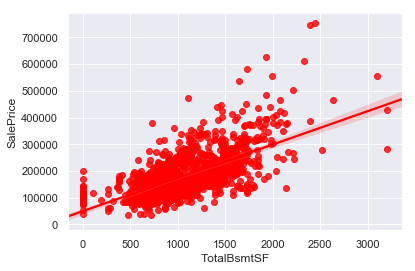

In [212]:
sns.regplot('TotalBsmtSF','SalePrice',data=train, color='red');

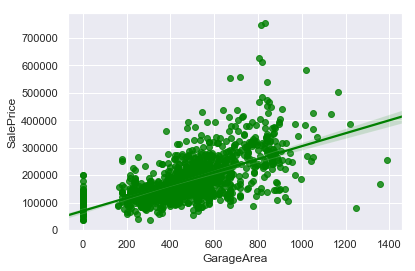

In [213]:
sns.regplot('GarageArea','SalePrice',data=train,color='green');

## 1.3 Skewed Key Variable (Taking care of Skewed Features is later)

In [214]:
print("Skewness of Sale Price: %f" % train['SalePrice'].skew())

Skewness of Sale Price: 1.881296


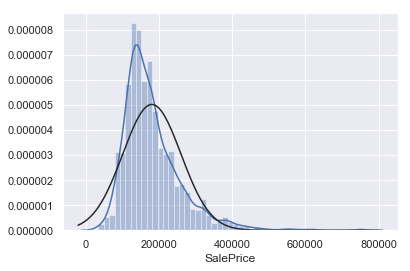

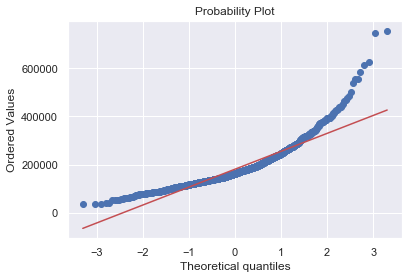

In [215]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure() #If you don't add this, you get a weird probability distribution graph
res = stats.probplot(train['SalePrice'], plot=plt)

In [216]:
train["SalePrice"] = np.log1p(train["SalePrice"]) # Take the Log of each value and add one 
print("Skewness of Sale Price: %f" % train['SalePrice'].skew())

Skewness of Sale Price: 0.121580


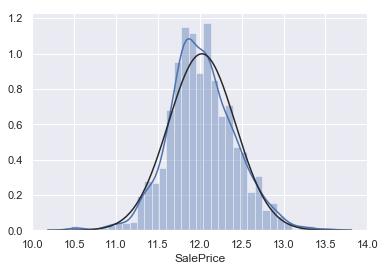

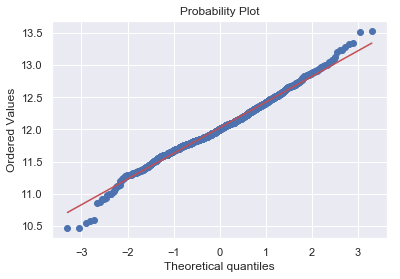

In [217]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure() #If you don't add this, you get a weird probability distribution graph
res = stats.probplot(train['SalePrice'], plot=plt)

## 1.4 Concatanation  

In [218]:
#This is compiling the data together for data processing 
#(e.g imputing missing data, implementing label encoding, dummy variables etc...)
ntrain = train.shape[0] #showing how many houses there are
ntest = test.shape[0] #same thing
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


## 2. Missing Data

In [219]:
#Averaging out missing data to get a ratio
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
#Sort it
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
#Look at what's missing
NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]

,Train,Test
Alley,1367,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


Text(0.5, 1.0, 'Percent missing data by feature')

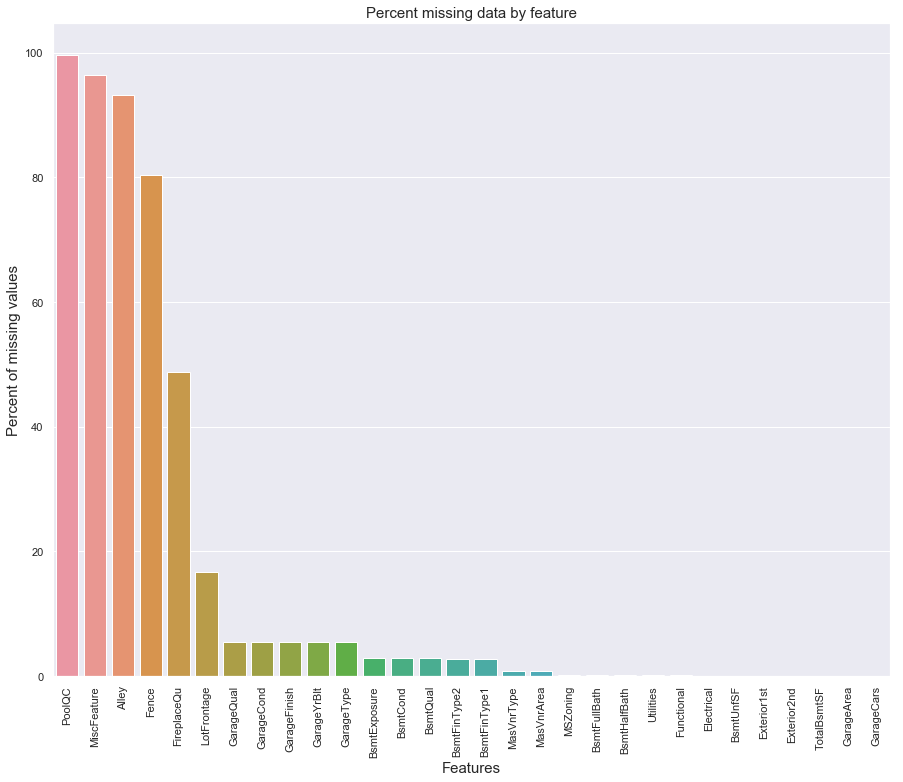

In [220]:
#Show this graphically
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [221]:
#Manually impute all these features
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [222]:
#Take care of the Garage and Basement features we can use 
#For loops to handle (Categorical and Numerical)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [223]:
#In this cell, we have enough data to use averages (median ande mode respectively)
#to replace missing values 

#For LotFrontage we can group by Neighborhood and take the median of the
#neighorhood as the missing LotFrontage
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#We just use the mode to fill out the missing data for these features
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_col:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [224]:
#By looking at the documentation you can see the details about these features

#Utilities is a useless variable, it's the same value every time except for 
#the 3 missing values
all_data = all_data.drop(['Utilities'], axis=1)
#The only missing values for Functional will be "Typ" due to its nature
all_data["Functional"] = all_data["Functional"].fillna("Typ")


In [225]:
#Check if we missed any missing values
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Data' :all_data_na})
missing_data.head()

,Missing Data


## 3. Feature Transformation

In [226]:
#These features are meant to be strings but they only have number values
#So they're read as int/double 
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

## 3.1 Label Encoding

In [227]:
from sklearn.preprocessing import LabelEncoder
#A collection of all the categorical columns
#A model can't read letters so we give each feature a numeric equal
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [228]:
#Creating a new variable for showing TotalSF, an accurate gauge of how 
#big a house is which effects the SalePrice, obviously
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

## 4. Skewed Features

In [229]:
#Importing boxcox packages
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#This is just gathering an array of all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #All possible numeric datatypes
numerics = [] #Empty array we will use to store numeric features
for i in all_data.columns: #Loop through all columns and add the column to the array if it's datatype is numeric
    if all_data[i].dtype in numeric_dtypes:
        numerics.append(i)

#Apply the skew function to all numeric features
skew_features = all_data[numerics].apply(lambda x: skew(x)).sort_values(ascending=False) 

#Create a variable for high skew features
high_skew = skew_features[skew_features > 0.5]
#Get the index of all high skew features 
skew_index = high_skew.index

#Loop through these features and apply a boxcox transformation to normalise them
for i in skew_index:
    all_data[i] = boxcox1p(all_data[i], boxcox_normmax(all_data[i] + 1))

## 5. Dummy Features

In [230]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 220)

In [231]:
train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape

(1458, 220)

## Data Preprocessing Concluded

## 6. Linear Regression Objects 

In [232]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

## 6.1 Cross-Validation (estimating skill of model on new data)

In [233]:
#An explanation of Cross-Validation
    #Shuffle the dataset randomly.
    #Split the dataset into k groups
    #For each unique group:
    #Take the group as a hold out or test data set
    #Take the remaining groups as a training data set
    #Fit a model on the training set and evaluate it on the test set
    #Retain the evaluation score and discard the model
    #Summarize the skill of the model using the sample of model evaluation scores

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## 6.2 Scoring and Fitting Models

In [234]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.2582 (0.0279)



In [235]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1095 (0.0069)



In [236]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1095 (0.0070)



In [237]:
LassoMd = lasso.fit(train.values,y_train)
ENetMd = ENet.fit(train.values,y_train)
KRRMd = KRR.fit(train.values,y_train)

In [238]:
finalMd = (np.expm1(LassoMd.predict(test.values)) + np.expm1(ENetMd.predict(test.values)) + np.expm1(KRRMd.predict(test.values)) ) / 3
finalMd

array([116947.70277848, 150745.64282929, 188044.46199524, ...,
       160086.48508883, 103718.70905185, 227905.61862525])

In [239]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = finalMd
sub.to_csv('submission.csv',index=False)